# (1) 데이터 가져오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split

df=pd.read_csv('train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [2]:
# df['datetime'].astype('datetime64[ns]')
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['second'] = df['datetime'].dt.second
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


# (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

<Figure size 720x576 with 0 Axes>

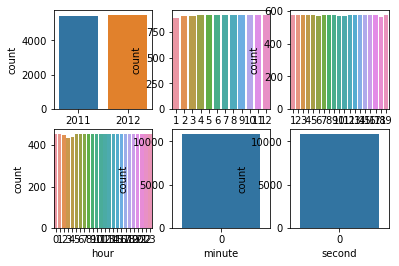

In [3]:
fig = plt.figure(figsize = (10,8))
fig, ax = plt.subplots(2,3)


sns.countplot(x=df['year'],ax=ax[0,0])
sns.countplot(x=df['month'],ax=ax[0,1])
sns.countplot(x=df['day'],ax=ax[0,2])
sns.countplot(x=df['hour'],ax=ax[1,0])
sns.countplot(x=df['minute'],ax=ax[1,1])
sns.countplot(x=df['second'],ax=ax[1,2])
plt.show()

# (4) X, y 컬럼 선택 및 train/test 데이터 분리

In [4]:
df.columns
X= df[[ 'year','month', 'day', 'hour', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'
       ]]
y= df[['count']]


X.head()
# X = df.iloc[:,:9]
# X1 = df.iloc[:,12:]
# X1.head()
# df=df.insert(9,X1)
# df.head()



,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011,1,1,0,1,0,0,1,9.84,14.395,81,0.0
1,2011,1,1,1,1,0,0,1,9.02,13.635,80,0.0
2,2011,1,1,2,1,0,0,1,9.02,13.635,80,0.0
3,2011,1,1,3,1,0,0,1,9.84,14.395,75,0.0
4,2011,1,1,4,1,0,0,1,9.84,14.395,75,0.0


In [5]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 12) (8708, 1)
(2178, 12) (2178, 1)


# (5) LinearRegression 모델 학습

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(X_test)
y_pred

array([[248.10627003],
       [ 48.79765547],
       [200.90676727],
       ...,
       [309.7528022 ],
       [ 38.17030198],
       [243.62697388]])

In [8]:
y_test

,count
3133,127
5786,13
5224,163
8953,233
8054,222
...,...
1963,351
5807,2
10061,509
5427,5


# (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [9]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
print('mse:',mse,'rmse:',rmse)
#mse: 19945.370053753584 rmse: 141.22807813516965
#mse: 21648.706125102446 rmse: 147.13499286404456 year 뺐을때

mse: 19945.370053753526 rmse: 141.22807813516945


# (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

Text(0.5, 1.0, 'temp')

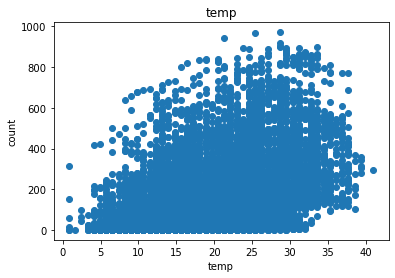

In [10]:
plt.scatter(X_train['temp'].values, y_train)
plt.xlabel('temp')
plt.ylabel('count')
plt.title('temp')

Text(0.5, 1.0, 'humidity')

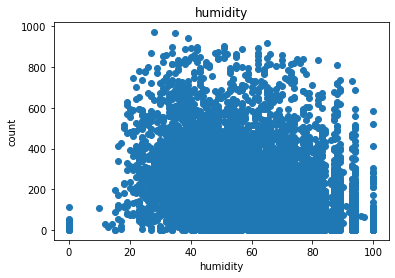

In [11]:
plt.scatter(X_train['humidity'].values, y_train)
plt.xlabel('humidity')
plt.ylabel('count')
plt.title('humidity')

# (번외)

Text(0.5, 1.0, 'hourly count')

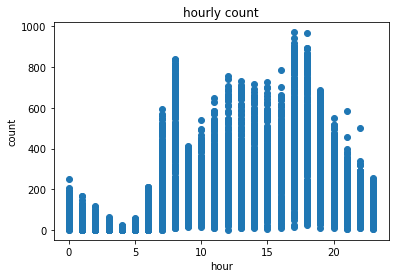

In [12]:
plt.scatter(X_train['hour'].values, y_train)
plt.xlabel('hour')
plt.ylabel('count')
plt.title('hourly count')

ValueError: x and y must be the same size

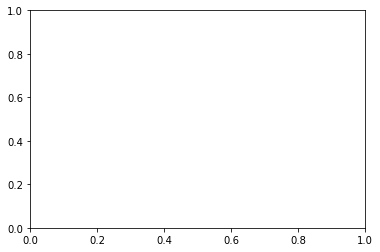

In [17]:
plt.scatter(X_train['hour'].values, y_pred)
plt.xlabel('hour')
plt.ylabel('count')
plt.title('hourly count')

In [ ]:
figure, axes = plt.subplots(ncols = 2)

fig = plt.figure(figsize = (10,8))
# figure.set_size(10, 4)
sns.histplot(y, bins =50, ax = axes[0])
axes[0].set_title('Train Data Distribution')
sns.histplot(y_pred, bins=50, ax=axes[1])
axes[1].set_title('Predicted Test Data Distribution')

# plt.bar(X_test['temp',y_test)

# plt.scatter(X_test[:, 0], y_test, label="true")
# plt.scatter(X_test[:, 0], predictions, label="pred")
# plt.legend()
# plt.show()